In [69]:
# Fossil fuel energy consumption (% of total)	

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data_final/fossil_consumption.csv')

# Rename columns
filtered_df = df.rename(columns={'Country Name': 'Country'})

# Filter for only needed columns
relevant_columns = ['Country', '2019', '2020', '2021', '2022', '2023']
filtered_df = filtered_df[relevant_columns]

# Sort
filtered_df = filtered_df.sort_values(by='Country')
filtered_df.head()



,Country,2019,2020,2021,2022,2023
0,Albania,59.41,57.07,56.22,55.06,NaN
1,Armenia,73.70,74.13,78.22,75.78,NaN
2,Austria,67.22,65.35,64.90,64.10,62.06
3,Azerbaijan,99.08,99.19,99.43,100.00,NaN
7,Belarus,94.01,92.59,87.69,86.62,NaN


In [70]:
print(f'Data shape: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns')

Data shape: 43 rows, 6 columns


In [71]:
# Get the distinct countries
distinct_countries_count = filtered_df['Country'].nunique()
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'There are {distinct_countries_count} countries in the dataset')
print(f'Countries: {distinct_countries}')



There are 43 countries in the dataset
Countries: ['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg'
 'Malta' 'Moldova' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'Serbia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Turkiye' 'Ukraine' 'United Kingdom']


In [72]:
# Rename countries to match the names from other datasets
country_mapping = {
    'Turkiye': 'Turkey',
    'Czechia': 'Czech Republic'
}

filtered_df['Country'] = filtered_df['Country'].replace(country_mapping)

In [73]:
# Get the distinct countries
distinct_countries = filtered_df['Country'].unique()

# Display the result
print(f'Countries: {distinct_countries}')


Countries: ['Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg'
 'Malta' 'Moldova' 'Montenegro' 'Netherlands' 'North Macedonia' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Russian Federation' 'Serbia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine' 'United Kingdom']


Country     0
2019        0
2020        0
2021        0
2022        0
2023       17
dtype: int64

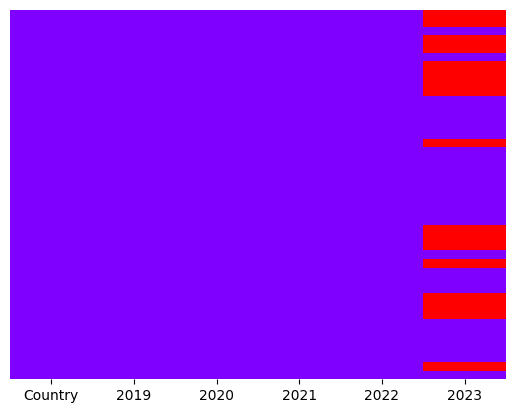

In [61]:
# Display null values
sns.heatmap(filtered_df.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')

# Count null values
filtered_df.isnull().sum()

In [74]:
# Drop column for 2023 (TO DO add prediction later)

filtered_df = filtered_df.drop(labels='2023',axis=1)
filtered_df.head()

,Country,2019,2020,2021,2022
0,Albania,59.41,57.07,56.22,55.06
1,Armenia,73.70,74.13,78.22,75.78
2,Austria,67.22,65.35,64.90,64.10
3,Azerbaijan,99.08,99.19,99.43,100.00
7,Belarus,94.01,92.59,87.69,86.62


In [63]:

filtered_df.describe()

,2019,2020,2021,2022
count,43.000000,43.000000,43.000000,43.000000
mean,70.894419,69.506047,69.264186,69.054651
std,17.543010,17.660982,17.667808,17.815392
min,11.200000,10.340000,11.110000,11.690000
25%,65.300000,62.420000,63.795000,63.000000
50%,72.230000,70.470000,70.320000,71.340000
75%,82.810000,81.885000,82.125000,81.740000
max,99.080000,99.190000,99.430000,100.000000


In [65]:
# Save file for using for forecast
filtered_df.to_csv('../data_for_forecast/fossil-consumption-clean.csv', index=False)
filtered_df.head()

,Country,2019,2020,2021,2022
0,Albania,59.41,57.07,56.22,55.06
1,Armenia,73.70,74.13,78.22,75.78
2,Austria,67.22,65.35,64.90,64.10
3,Azerbaijan,99.08,99.19,99.43,100.00
7,Belarus,94.01,92.59,87.69,86.62


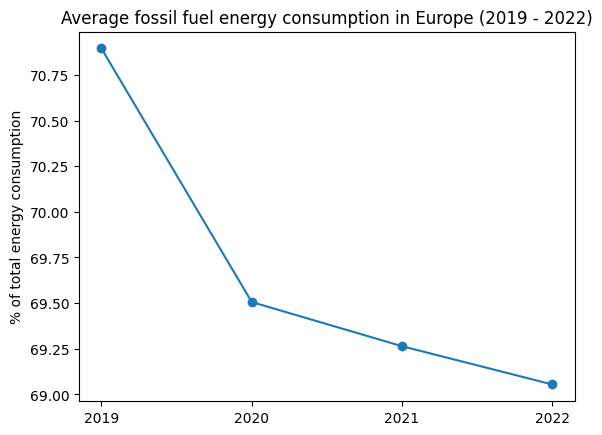

In [75]:
# TREND ANALYSIS OVER TIME - FOSSIL CONSUMPTION OVER THE YEARS	

years = ['2019','2020','2021','2022']

yearly_total_fc= filtered_df[years].mean(axis=0)
plt.plot(yearly_total_fc.index, yearly_total_fc.values, marker='o')
#plt.xticks([2019,2020,2021,2022,2023])
plt.title('Average fossil fuel energy consumption in Europe (2019 - 2022)')
plt.ylabel('% of total energy consumption')
plt.show()

               Country   2019   2020   2021    2022  Fossil consumption (avg)
3           Azerbaijan  99.08  99.19  99.43  100.00                   99.4250
7              Belarus  94.01  92.59  87.69   86.62                   90.2275
37  Russian Federation  89.09  88.45  89.46   89.45                   89.1125
30               Malta  87.45  88.58  88.08   87.17                   87.8200
9               Cyprus  90.00  87.61  86.87   86.50                   87.7450
32         Netherlands  89.64  87.77  86.20   83.92                   86.8825
34              Poland  86.23  85.40  87.22   86.42                   86.3175
22             Ireland  86.87  85.91  86.58   85.84                   86.3000
38              Serbia  86.62  84.51  82.44   83.02                   84.1475
41              Turkey  83.16  82.60  83.83   81.77                   82.8400


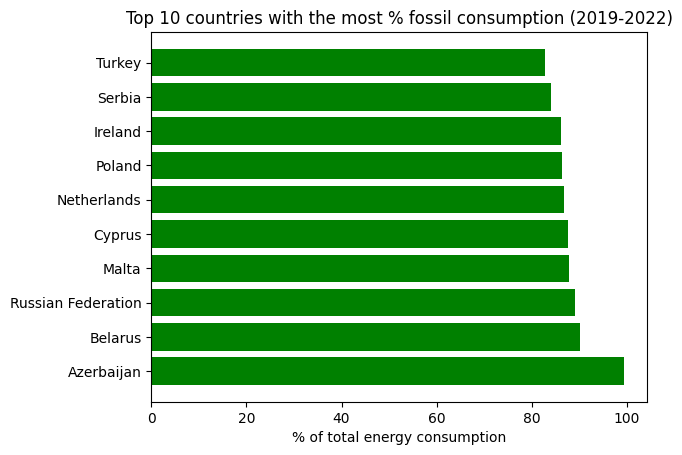

In [76]:
# TOP COUNTRIES WITH THE MOST % OF FOSSIL CONSUMPTION

filtered_df['Fossil consumption (avg)'] = filtered_df.mean(axis=1,numeric_only=True)

top_countries = filtered_df.sort_values(by='Fossil consumption (avg)', ascending=False)

print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Fossil consumption (avg)'][:10], color='green')
plt.title('Top 10 countries with the most % fossil consumption (2019-2022)')
plt.xlabel('% of total energy consumption')
plt.show()


        Country   2019   2020   2021   2022  Fossil consumption (avg)
23      Iceland  11.20  10.34  11.11  11.69                   11.0850
40       Sweden  26.13  25.17  25.12  24.28                   25.1750
15      Finland  39.79  39.27  36.31  35.74                   37.7775
8   Switzerland  47.91  47.41  48.30  45.34                   47.2400
16       France  47.74  46.85  47.34  49.71                   47.9100
33       Norway  52.11  51.78  50.61  46.54                   50.2600
27       Latvia  56.35  53.24  53.05  49.12                   52.9400
12      Denmark  58.52  55.01  53.53  54.36                   55.3550
0       Albania  59.41  57.07  56.22  55.06                   56.9400
39     Slovenia  60.99  58.34  58.93  59.15                   59.3525


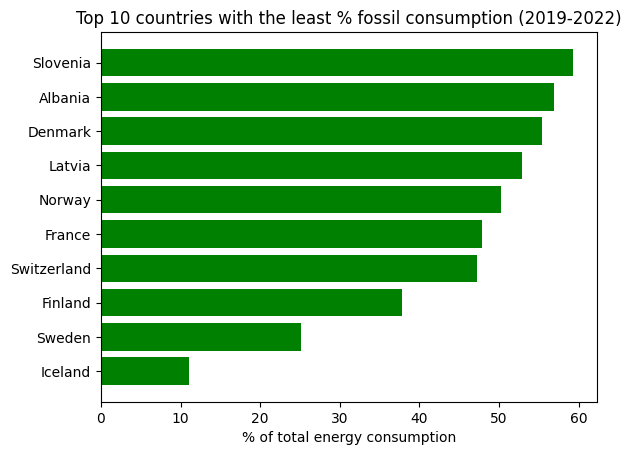

In [77]:
# TOP COUNTRIES WITH THE LEAST % OF FOSSIL CONSUMPTION

filtered_df['Fossil consumption (avg)'] = filtered_df.mean(axis=1,numeric_only=True)

top_countries = filtered_df.sort_values(by='Fossil consumption (avg)', ascending=True)

print(top_countries.head(10))

# Plot the top 10 countries
plt.barh(top_countries['Country'][:10], top_countries['Fossil consumption (avg)'][:10], color='green')
plt.title('Top 10 countries with the least % fossil consumption (2019-2022)')
plt.xlabel('% of total energy consumption')
plt.show()


In [78]:
# Renewable energy generation - lower % of fossil consumption -> better sustainability 


filtered_df['Fossil consumption (avg)'] = filtered_df[years].mean(axis=1)

avg_fossil_consumption = filtered_df[['Country', 'Fossil consumption (avg)']].copy()

#  Normalize the average values (0 = worst, 1 = best)
max_val = avg_fossil_consumption['Fossil consumption (avg)'].max()
min_val = avg_fossil_consumption['Fossil consumption (avg)'].min()

avg_fossil_consumption['fossil_consumption_subindex'] = (max_val - avg_fossil_consumption['Fossil consumption (avg)']) / (max_val - min_val)

avg_fossil_consumption.sort_values(by='fossil_consumption_subindex', ascending=False)

,Country,Fossil consumption (avg),fossil_consumption_subindex
23,Iceland,11.0850,1.000000
40,Sweden,25.1750,0.840503
15,Finland,37.7775,0.697844
8,Switzerland,47.2400,0.590729
16,France,47.9100,0.583145
33,Norway,50.2600,0.556543
27,Latvia,52.9400,0.526206
12,Denmark,55.3550,0.498868
0,Albania,56.9400,0.480926
39,Slovenia,59.3525,0.453617


In [79]:
avg_fossil_consumption.to_csv('../data_subindex/subindex_fossil_consumption_2019-2022.csv', index=False)

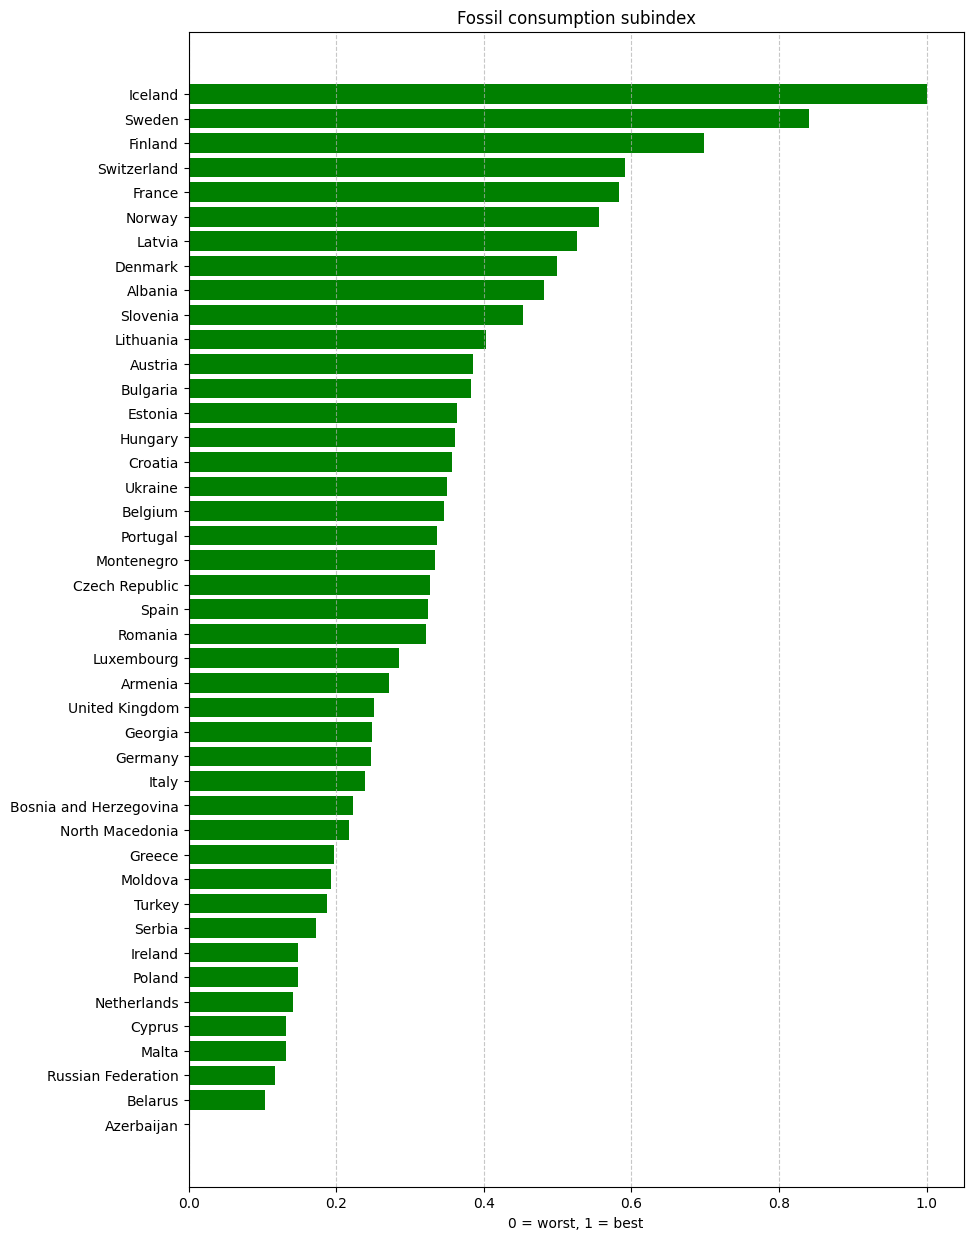

In [80]:
avg_fossil_consumption = avg_fossil_consumption.sort_values(by='fossil_consumption_subindex')

plt.figure(figsize=(10,15))
plt.barh(avg_fossil_consumption['Country'],avg_fossil_consumption['fossil_consumption_subindex'], color='green')
plt.xlabel('0 = worst, 1 = best')
plt.title('Fossil consumption subindex')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()